In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
RANDOM_SEED: int = 1
plt.style.use("tableau-colorblind10")

In [3]:
df = pd.read_csv("data/fastfood.csv")
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
df.shape

(515, 17)

In [5]:
df.dtypes

restaurant      object
item            object
calories         int64
cal_fat          int64
total_fat        int64
sat_fat        float64
trans_fat      float64
cholesterol      int64
sodium           int64
total_carb       int64
fiber          float64
sugar            int64
protein        float64
vit_a          float64
vit_c          float64
calcium        float64
salad           object
dtype: object

## What is the fast food with most and least calories?

In [6]:
df[df["calories"] == df["calories"].max()]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,2430,1270,141,24.0,2.0,475,6080,103,2.0,3,186.0,0.0,2.0,8.0,Other


In [7]:
df[df["calories"] == df["calories"].min()]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
302,Dairy Queen,Side Salad,20,0,0,0.0,0.0,0,15,5,2.0,3,1.0,50.0,30.0,15.0,Other


### What about McDonald's specifically?

In [8]:
df_mcdonalds = df[df["restaurant"] == "Mcdonalds"]
df_mcdonalds.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


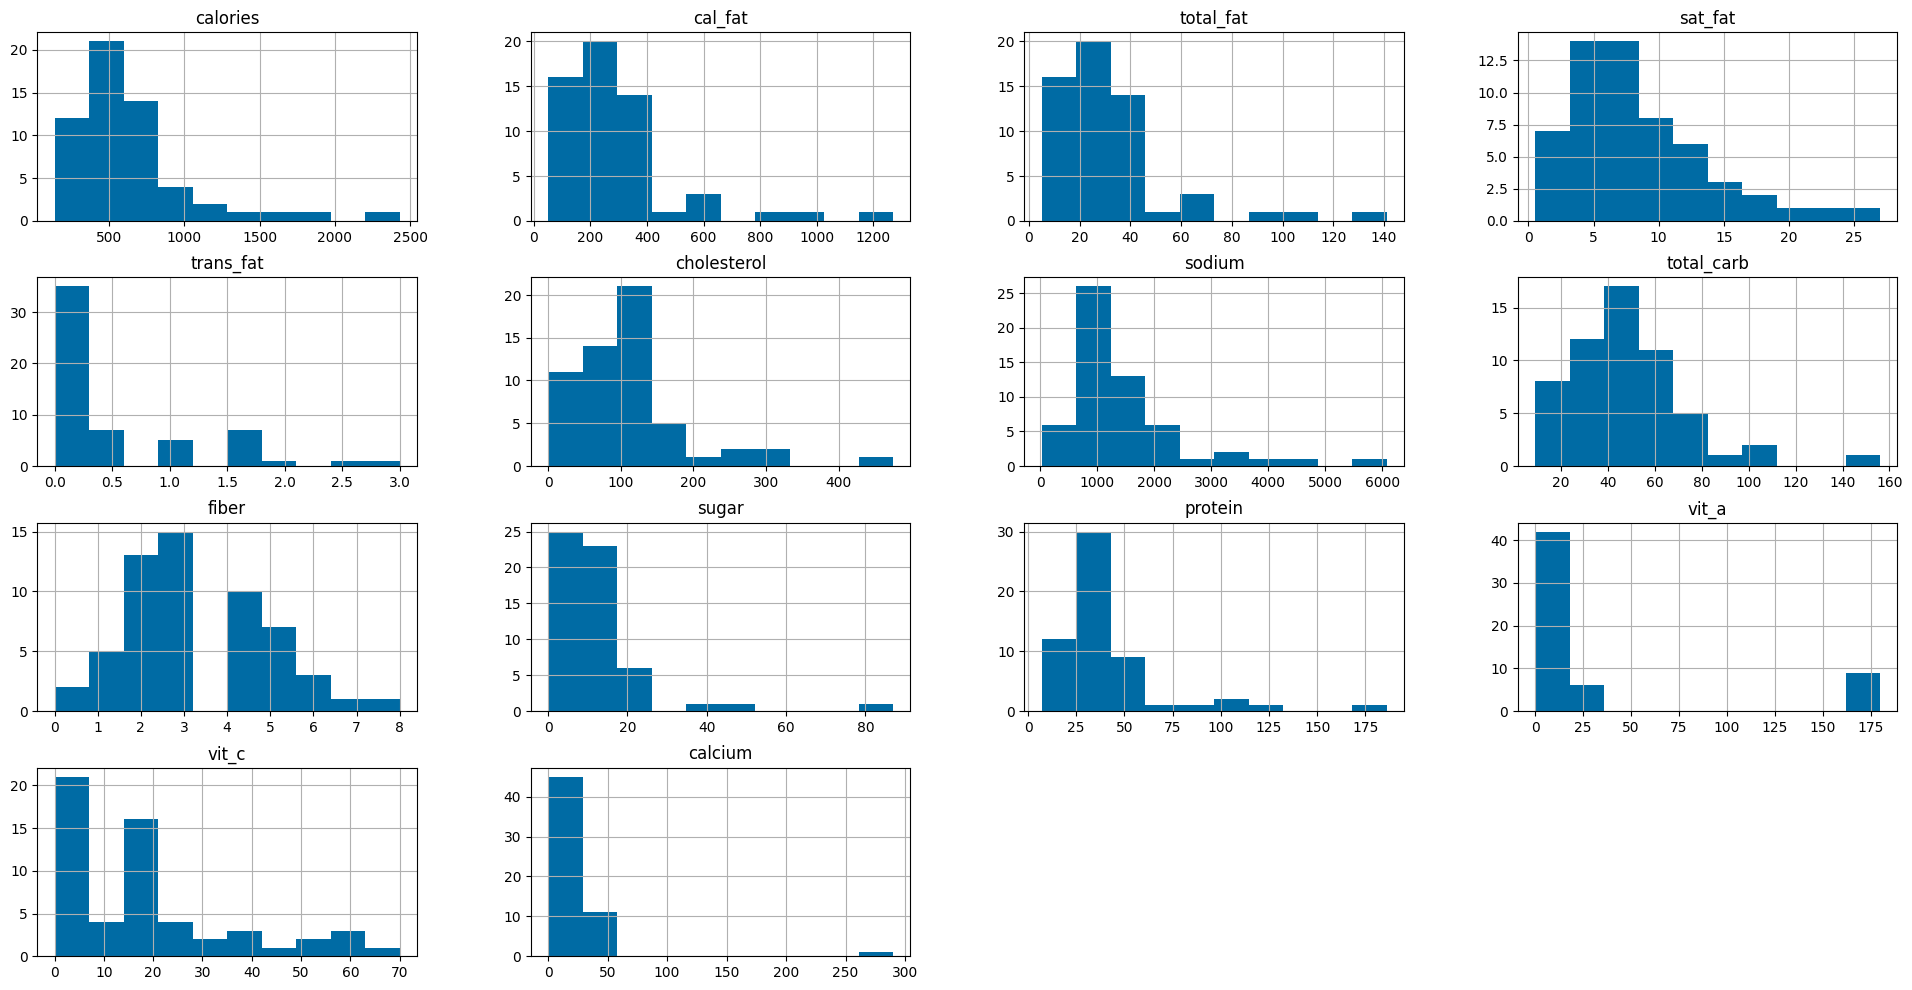

In [9]:
df_mcdonalds.hist(figsize=(24, 12));

### What are McDonald's products with the least amount of sugar?

In [10]:
df_mcdonalds[df_mcdonalds["sugar"] == df_mcdonalds["sugar"].min()]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
34,Mcdonalds,3 piece Buttermilk Crispy Chicken Tenders,370,190,21,3.5,0.0,70,910,16,0.0,0,28.0,0.0,0.0,2.0,Other
40,Mcdonalds,4 Piece Chicken McNuggets,180,100,11,2.0,0.0,30,340,11,1.0,0,10.0,0.0,2.0,0.0,Other
41,Mcdonalds,6 Piece Chicken McNuggets,270,140,16,2.5,0.0,45,510,16,1.0,0,15.0,0.0,2.0,0.0,Other
42,Mcdonalds,10 Piece Chicken McNuggets,440,240,27,4.5,0.0,75,840,26,2.0,0,24.0,0.0,4.0,2.0,Other
43,Mcdonalds,20 Piece Chicken McNuggets,890,480,53,9.0,0.0,145,1680,53,4.0,0,49.0,0.0,8.0,4.0,Other


### What are McDonald's products with the least amount of sodium?

In [11]:
df_mcdonalds[df_mcdonalds["sodium"] == df_mcdonalds["sodium"].min()]

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
48,Mcdonalds,Premium Asian Salad w/o Chicken,140,70,7,0.5,0.0,0,20,13,5.0,7,7.0,180.0,45.0,10.0,Other


## How many restaurants do we have in total?

In [12]:
df["restaurant"].unique()

array(['Mcdonalds', 'Chick Fil-A', 'Sonic', 'Arbys', 'Burger King',
       'Dairy Queen', 'Subway', 'Taco Bell'], dtype=object)

In [13]:
df["restaurant"].nunique()

8

In [14]:
df["restaurant"].value_counts()

restaurant
Taco Bell      115
Subway          96
Burger King     70
Mcdonalds       57
Arbys           55
Sonic           53
Dairy Queen     42
Chick Fil-A     27
Name: count, dtype: int64

### Can we guess a restaurant based on fast food features?

In [15]:
enc = dict(zip(df["restaurant"].unique(), range(df["restaurant"].nunique())))
df["restaurant"] = df["restaurant"].map(lambda x: enc[x])
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,0,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,0,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,0,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,0,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [16]:
df.drop(["item", "salad"], axis=1, inplace=True)
df.dropna(inplace=True)

In [17]:
features = df.loc[:, df.columns != "restaurant"].to_numpy()
labels = df["restaurant"].to_numpy()

In [18]:
xs_train, xs_test, ys_train, ys_test = train_test_split(
    features, labels, test_size=0.25, random_state=RANDOM_SEED
)

In [19]:
model = MLPClassifier()
model.fit(xs_train, ys_train)

MLPClassifier()

In [20]:
print(classification_report(ys_test, model.predict(xs_test)))

              precision    recall  f1-score   support

           0       0.18      0.17      0.17        12
           1       0.38      0.60      0.46         5
           2       0.50      0.31      0.38        13
           3       0.00      0.00      0.00         4
           5       0.25      0.25      0.25         8
           6       0.86      0.96      0.91        25
           7       0.42      0.56      0.48         9

    accuracy                           0.53        76
   macro avg       0.37      0.41      0.38        76
weighted avg       0.50      0.53      0.50        76



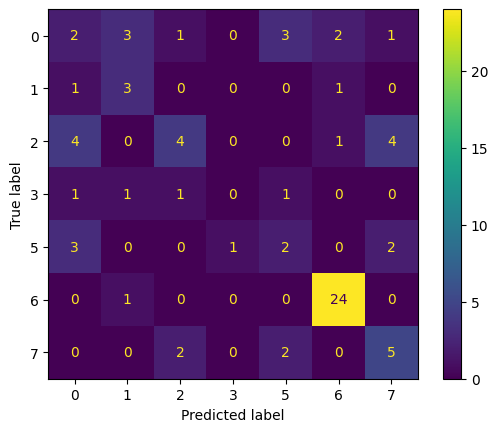

In [21]:
cm = confusion_matrix(ys_test, model.predict(xs_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.savefig("image/cm.png")